<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-23-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-22,1592656,90196,24159.0,1280.0
2020-05-23,1614954,91287,22298.0,1091.0
2020-05-24,1635760,91941,20806.0,654.0


In [7]:
dfCovidtracking[dfCovidtracking.state=='CA'][['positive', 'death', 'positiveIncrease', 'deathIncrease']].head(5)

,positive,death,positiveIncrease,deathIncrease
5,92710,3774,2079.0,66.0
61,90631,3708,2187.0,78.0
117,88444,3630,2247.0,88.0
173,86197,3542,2140.0,106.0
229,84057,3436,2262.0,102.0


In [8]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1635760
Total deaths = 91941


,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,2020-05-24,361515,1338311,0,4393.0,77295.0,1406.0,0.0,1067.0,0.0,64080.0,A,5/24/2020 00:00,0721a0530e6e28aae34941837949d2a83acf4048,2020-05-24T20:00:00Z,23391,77295.0,1699826,1699826,1699826,36,109.0,261.0,46176.0,1589.0,47765.0
NJ,2020-05-24,154154,449653,0,2857.0,0.0,760.0,0.0,639.0,0.0,25040.0,A+,5/24/2020 13:00,dab3bba187896cc21a3e3731fcb01010492ff4c9,2020-05-24T20:00:00Z,11133,0.0,603807,603807,603807,34,52.0,0.0,24022.0,1050.0,25072.0
IL,2020-05-24,110304,637617,0,3667.0,0.0,1007.0,0.0,632.0,0.0,0.0,A,5/24/2020 00:00,85e08efb7576f429016d4cc2c21d8e298c869a6e,2020-05-24T20:00:00Z,4856,0.0,747921,747921,747921,17,66.0,0.0,23166.0,2508.0,25674.0
CA,2020-05-24,92710,1490035,0,4300.0,0.0,1315.0,0.0,0.0,0.0,0.0,B,5/24/2020 00:00,63d7d8536ac6b7ca394af4d2fc4bdc016ccc8109,2020-05-24T20:00:00Z,3774,0.0,1582745,1582745,1582745,06,66.0,0.0,65360.0,2079.0,67439.0
MA,2020-05-24,92675,439698,0,2169.0,9308.0,558.0,0.0,0.0,0.0,0.0,A,5/24/2020 10:00,3634f229b8aba3cf304aa5b3083fa20d8ae5e1a1,2020-05-24T20:00:00Z,6372,9308.0,532373,532373,532373,25,68.0,48.0,10374.0,1013.0,11387.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [10]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
117,2020-05-18,1500312,11806021,84640,19839.0,786.0,0.917196
118,2020-05-19,1521252,12202812,86070,20940.0,1430.0,0.929997
119,2020-05-20,1542594,12608216,87472,21342.0,1402.0,0.943044
120,2020-05-21,1568497,13024762,88916,25903.0,1444.0,0.958880
121,2020-05-22,1592656,13419058,90196,24159.0,1280.0,0.973649
122,2020-05-23,1614954,13784786,91287,22298.0,1091.0,0.987281
123,2020-05-24,1635760,14163694,91941,20806.0,654.0,1.000000


In [11]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
75,2020-05-18,80430,1292672,3302,1591.0,41.0,0.867544
76,2020-05-19,81795,1339316,3334,1365.0,32.0,0.882267
77,2020-05-20,84057,1380120,3436,2262.0,102.0,0.906666
78,2020-05-21,86197,1421127,3542,2140.0,106.0,0.929749
79,2020-05-22,88444,1466773,3630,2247.0,88.0,0.953986
80,2020-05-23,90631,1515306,3708,2187.0,78.0,0.977575
81,2020-05-24,92710,1582745,3774,2079.0,66.0,1.000000


In [12]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-20,1542594,11065622,2973,40884.0,161616.0,9829.0,7319.0,4911.0,613.0,294312.0,87472,161616.0,12611189,12608216,12608216,1402.0,1982.0,384062.0,21342.0,405404.0
2020-05-21,1568497,11456265,3641,39915.0,166254.0,9090.0,7412.0,4868.0,616.0,298418.0,88916,166254.0,13028403,13024762,13024762,1444.0,4638.0,390643.0,25903.0,416546.0
2020-05-22,1592656,11826402,3709,38802.0,170697.0,9048.0,7689.0,4716.0,633.0,350135.0,90196,170697.0,13422767,13419058,13419058,1280.0,4443.0,370137.0,24159.0,394296.0
2020-05-23,1614954,12169832,4084,37873.0,172037.0,8812.0,7770.0,4620.0,638.0,361239.0,91287,172037.0,13788870,13784786,13784786,1091.0,1340.0,343430.0,22298.0,365728.0
2020-05-24,1635760,12527934,3860,36706.0,172574.0,8487.0,7801.0,4383.0,639.0,366736.0,91941,172574.0,14167554,14163694,14163694,654.0,537.0,358102.0,20806.0,378908.0


In [13]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-20,84057,1296063,0,4681.0,0.0,1345.0,0.0,0.0,0.0,0.0,3436,0.0,1380120,1380120,1380120,102.0,0.0,38542.0,2262.0,40804.0
2020-05-21,86197,1334930,0,4735.0,0.0,1310.0,0.0,0.0,0.0,0.0,3542,0.0,1421127,1421127,1421127,106.0,0.0,38867.0,2140.0,41007.0
2020-05-22,88444,1378329,0,4762.0,0.0,1317.0,0.0,0.0,0.0,0.0,3630,0.0,1466773,1466773,1466773,88.0,0.0,43399.0,2247.0,45646.0
2020-05-23,90631,1424675,0,4342.0,0.0,1312.0,0.0,0.0,0.0,0.0,3708,0.0,1515306,1515306,1515306,78.0,0.0,46346.0,2187.0,48533.0
2020-05-24,92710,1490035,0,4300.0,0.0,1315.0,0.0,0.0,0.0,0.0,3774,0.0,1582745,1582745,1582745,66.0,0.0,65360.0,2079.0,67439.0


In [14]:
rn = gbState.sum().loc['2020-05-02']
rn.positive/rn.totalTestResults*100

7.599995923139533

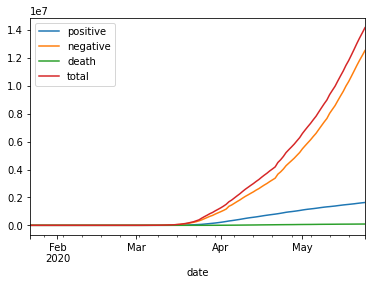

In [15]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

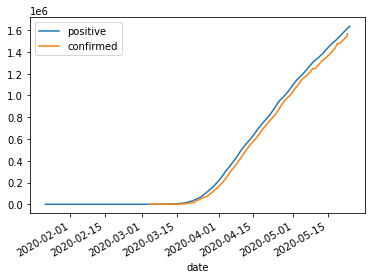

In [16]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [17]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1622612
dead           97087
dtype: int64

In [18]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    92539
dead          3738
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [20]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1622612
Brazil             347398
Russia             335882
United Kingdom     258504
Spain              235290
Italy              229327
France             182036
Germany            179986
Turkey             155686
Iran               133521
Name: confirmed, dtype: int64

In [21]:
dfctd_state_curr.head()

,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,2020-05-24,408,43099,0,10.0,0.0,0.0,0.0,0.0,0.0,358.0,C,5/24/2020 00:00,e2bf82610e6160d238c8d4885a1613e574c8c78e,2020-05-24T20:00:00Z,10,0.0,43507,43507,43507,02,0.0,0.0,1156.0,0.0,1156.0
AL,2020-05-24,14327,171472,0,0.0,1612.0,0.0,537.0,0.0,320.0,7951.0,B,5/24/2020 00:00,f24e300d8ade0e897be7b30508ab3eb9770c6269,2020-05-24T20:00:00Z,551,1612.0,185799,185799,185799,01,5.0,23.0,2734.0,389.0,3123.0
AR,2020-05-24,5922,102659,0,86.0,598.0,0.0,0.0,17.0,111.0,4148.0,A,5/24/2020 00:00,c1d90ab3a24aa7d620cfc0a574a67ad29ec6e3e9,2020-05-24T20:00:00Z,116,598.0,108581,108581,108581,05,3.0,8.0,5224.0,310.0,5534.0
AS,2020-05-24,0,124,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,5/19/2020 00:00,336f9f200e3019162e3a3b91f2a05c29a15f2a16,2020-05-24T20:00:00Z,0,0.0,124,124,124,60,0.0,0.0,0.0,0.0,0.0
AZ,2020-05-24,16339,167302,0,804.0,1945.0,322.0,0.0,201.0,0.0,4132.0,A+,5/24/2020 00:00,e89c395bcd3de8e0e9dcf896489649497155c576,2020-05-24T20:00:00Z,800,1945.0,183641,183641,183641,04,1.0,15.0,2902.0,300.0,3202.0


In [0]:
dfState = dfCovidtracking[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [24]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-05-24,50867,2316,50867,1.000000
FL,2020-05-23,50127,2312,50867,0.985452
FL,2020-05-22,49451,2268,50867,0.972163
FL,2020-05-21,48675,2222,50867,0.956907
FL,2020-05-20,47471,2173,50867,0.933238
FL,2020-05-19,46944,2129,50867,0.922877
FL,2020-05-18,46442,2073,50867,0.913008


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

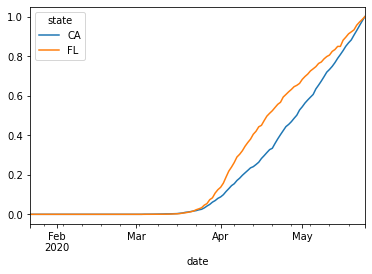

In [26]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

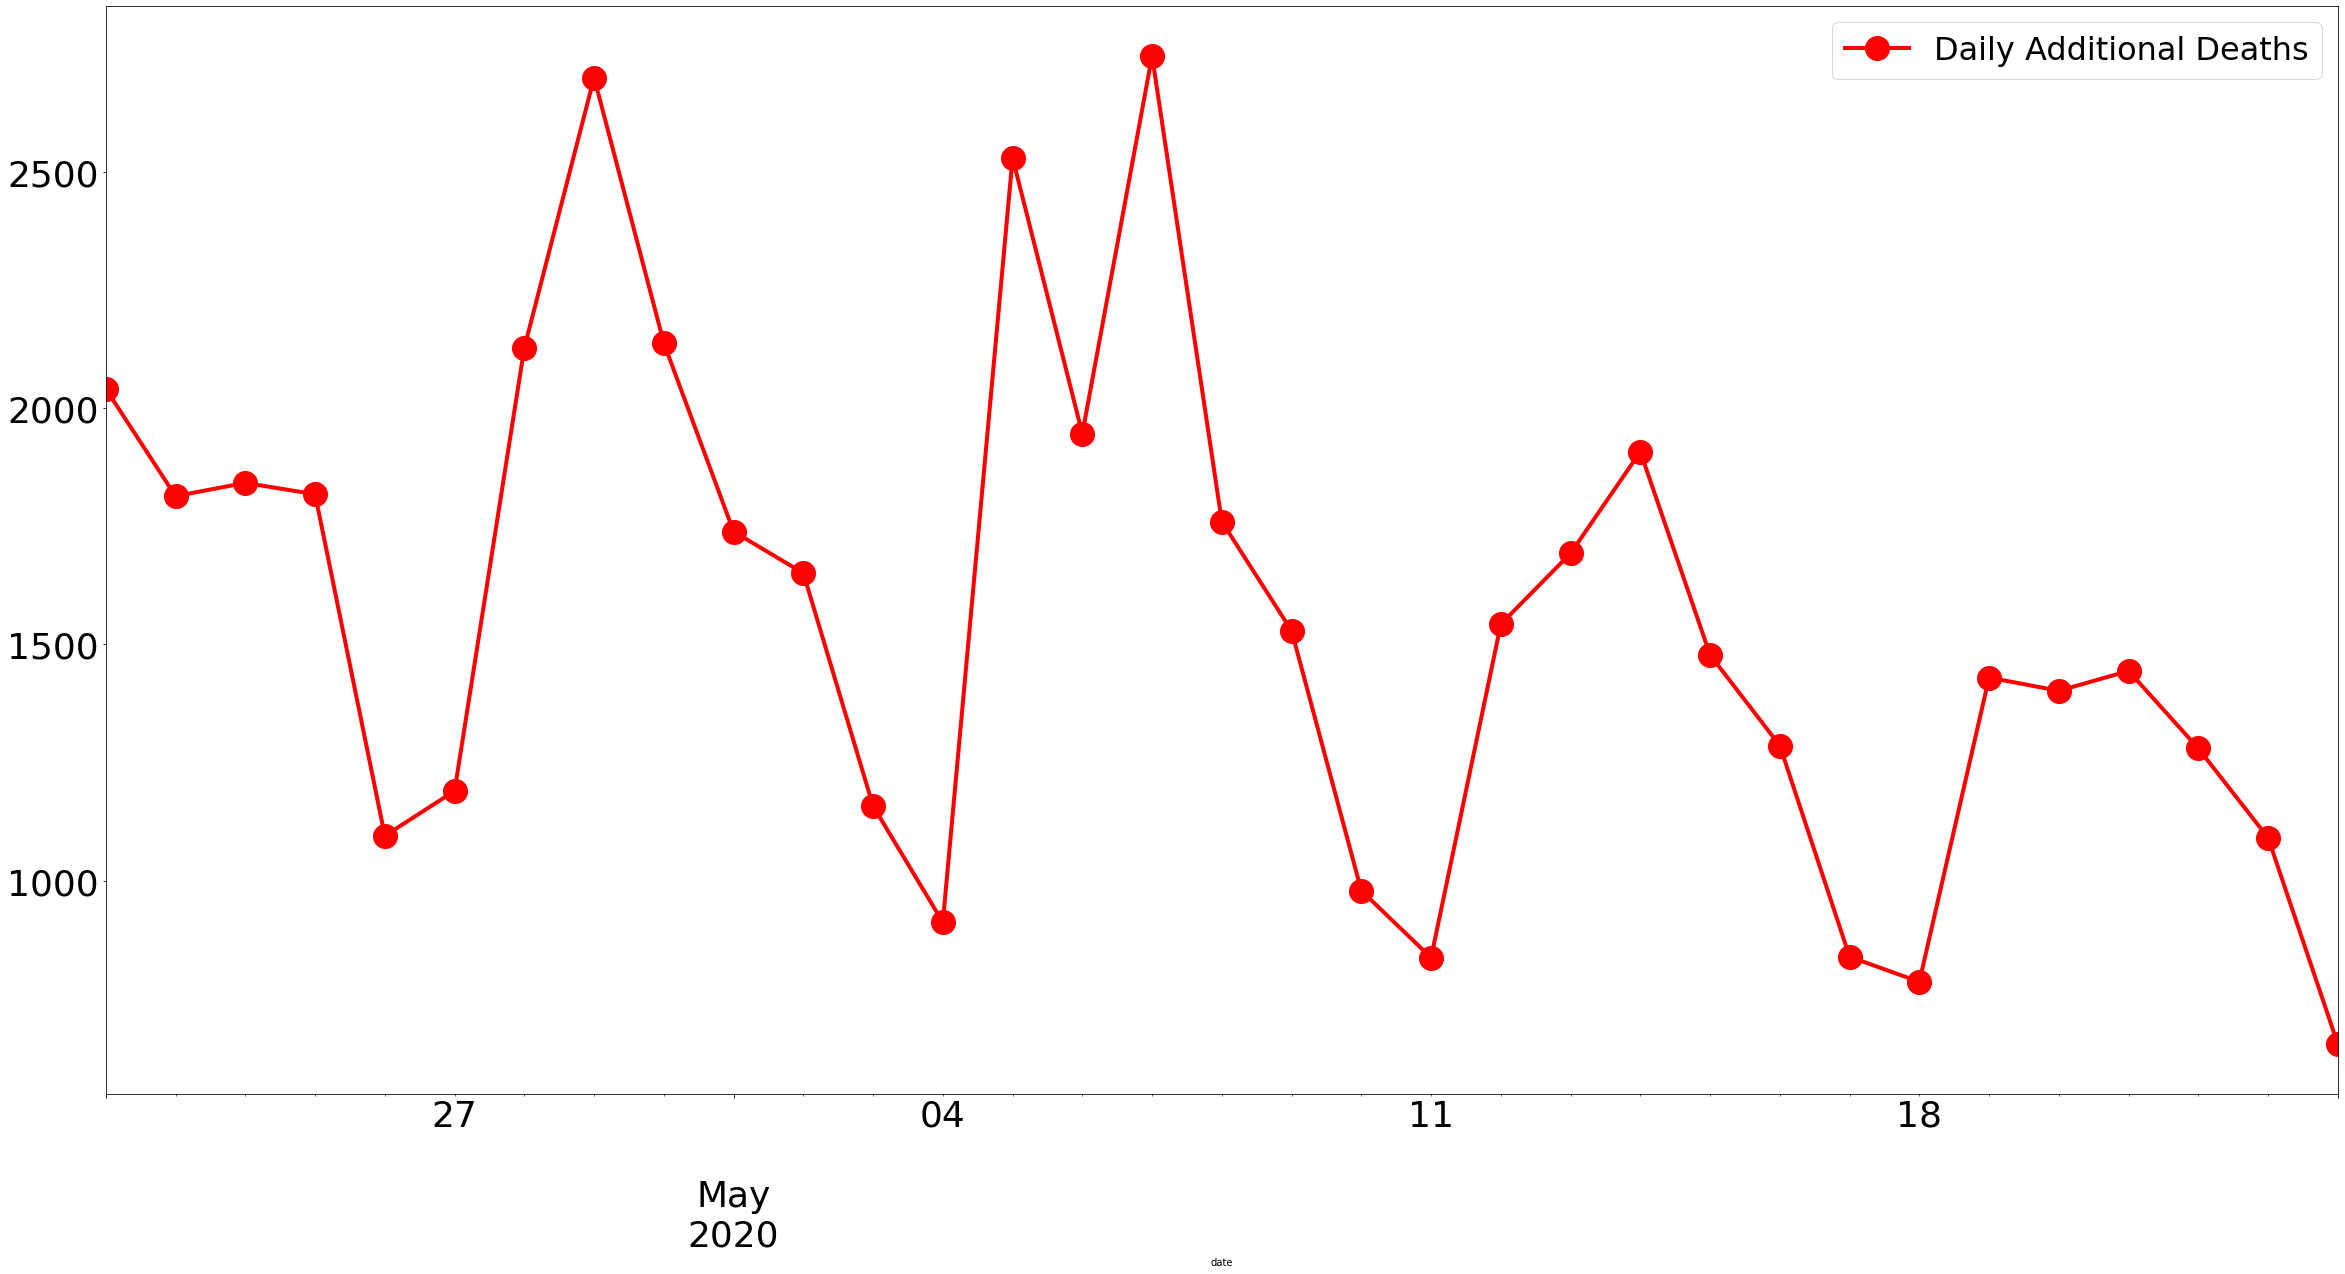

In [28]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


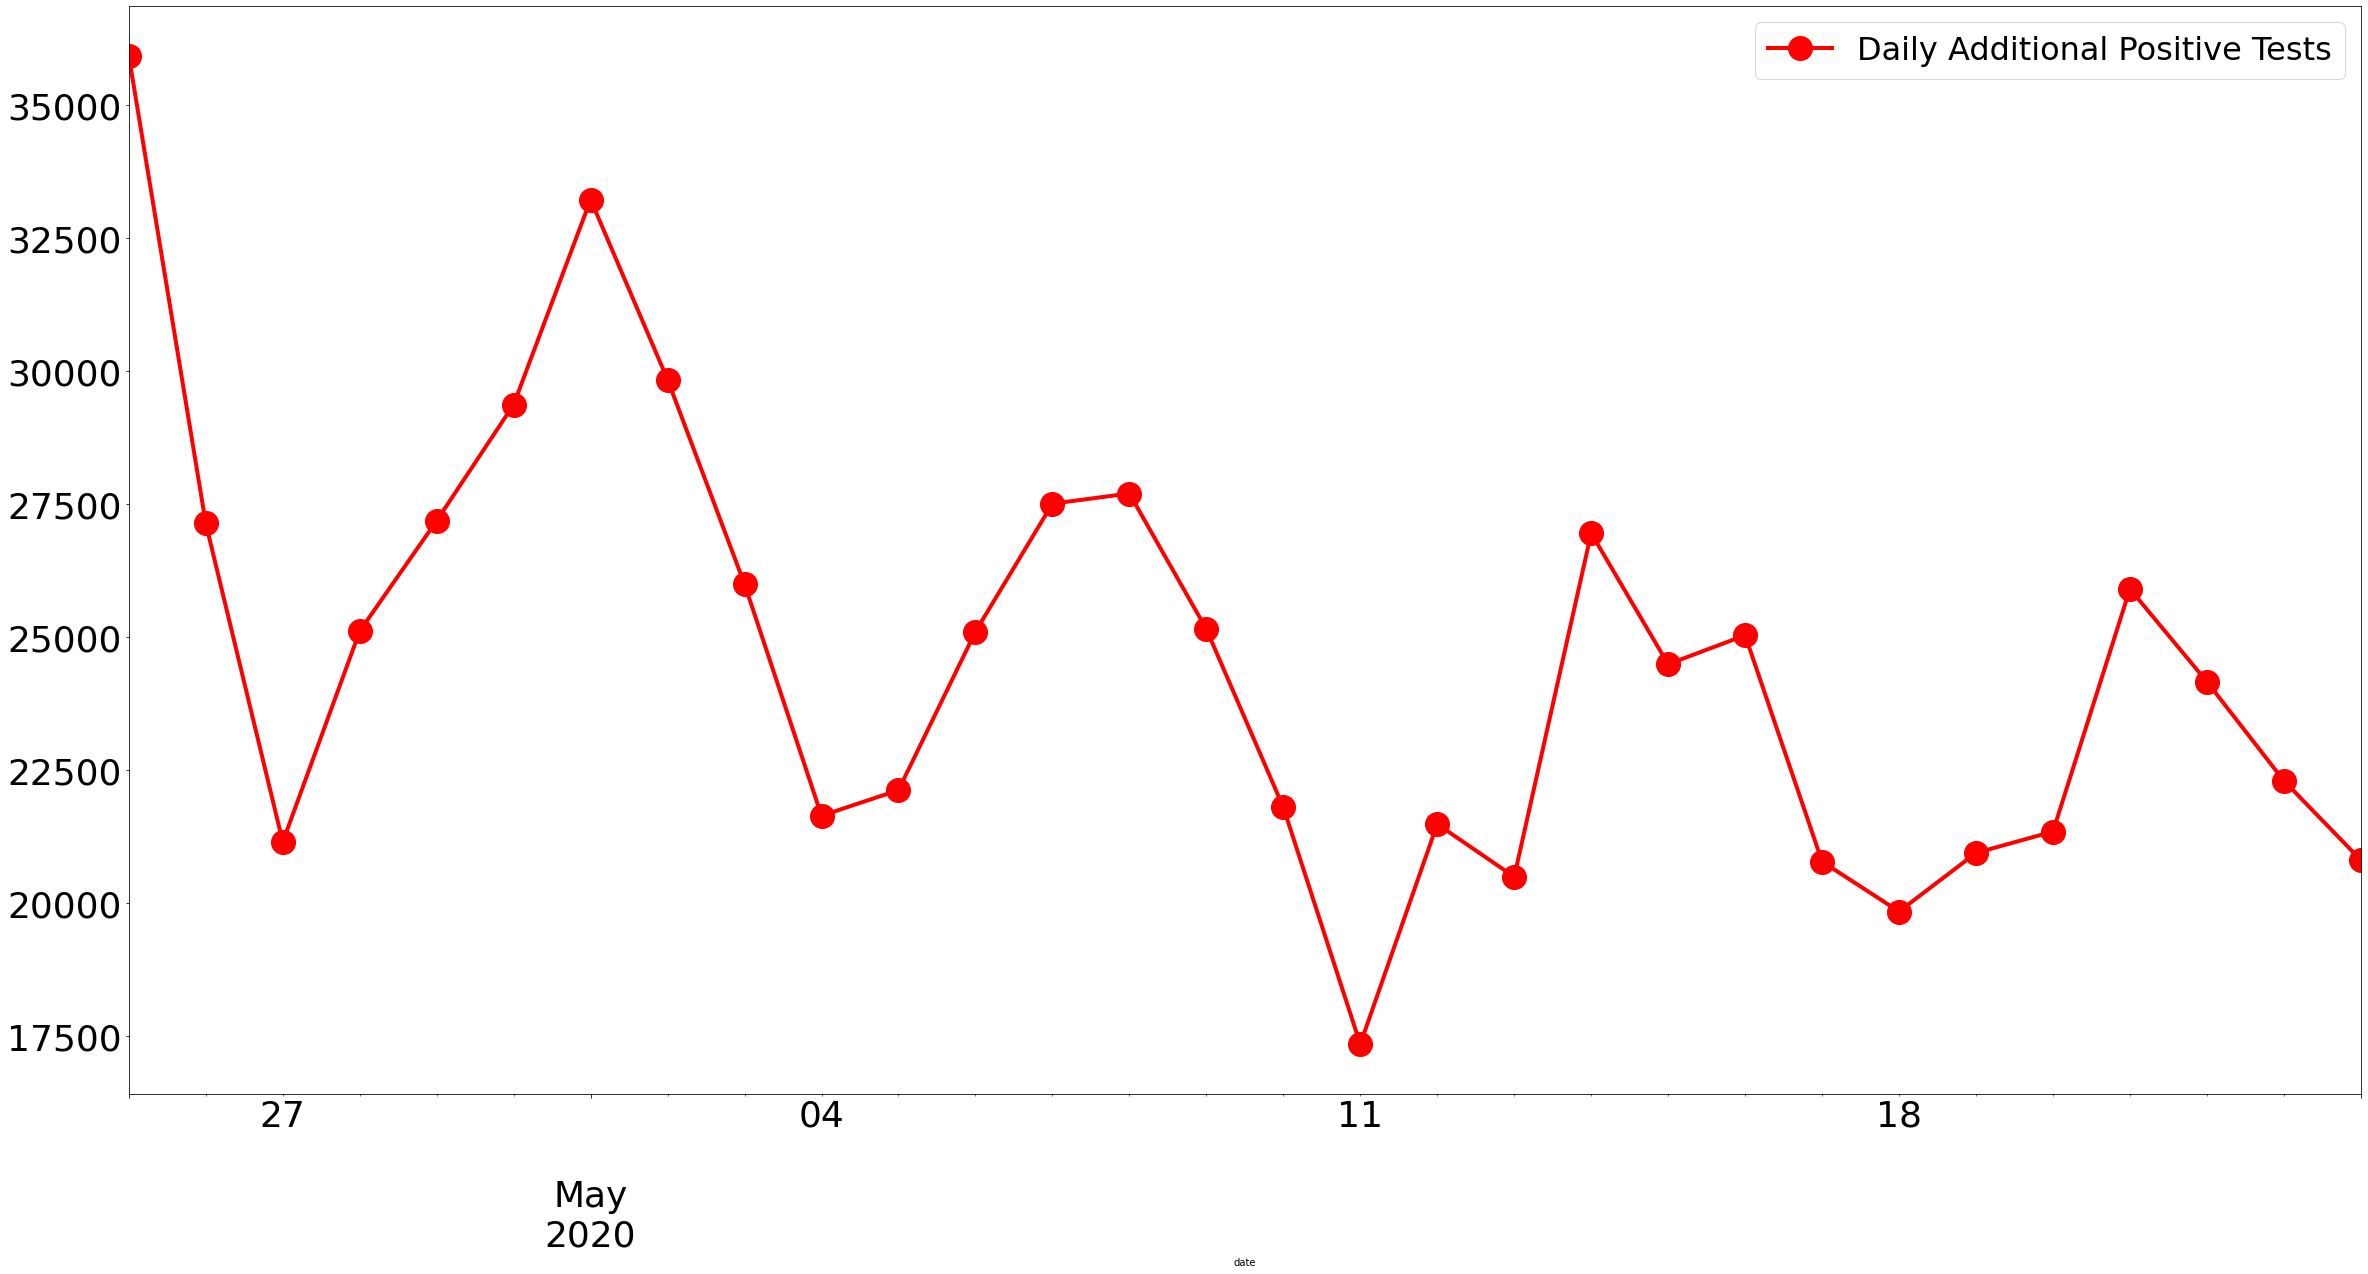

In [29]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()

chart = y1[-30:].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


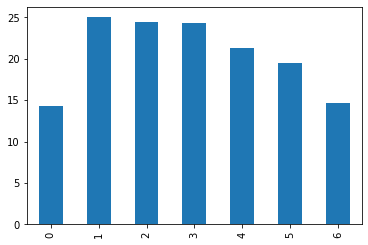

In [32]:
dfDoW.mean().deathIncrease.plot.bar()



In [33]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202015,12523.0,22930.0,834999.0,217011.0,1052010.0
202016,14063.0,21844.0,844332.0,199843.0,1044175.0
202017,12864.0,18239.0,1319356.0,209064.0,1528420.0
202018,12704.0,24854.0,1462961.0,191865.0,1654826.0
202019,12402.0,18984.0,1747407.0,171010.0,1909104.0
202020,9584.0,12125.0,2324282.0,156568.0,2480850.0
202021,8087.0,15669.0,2548088.0,155287.0,2703375.0


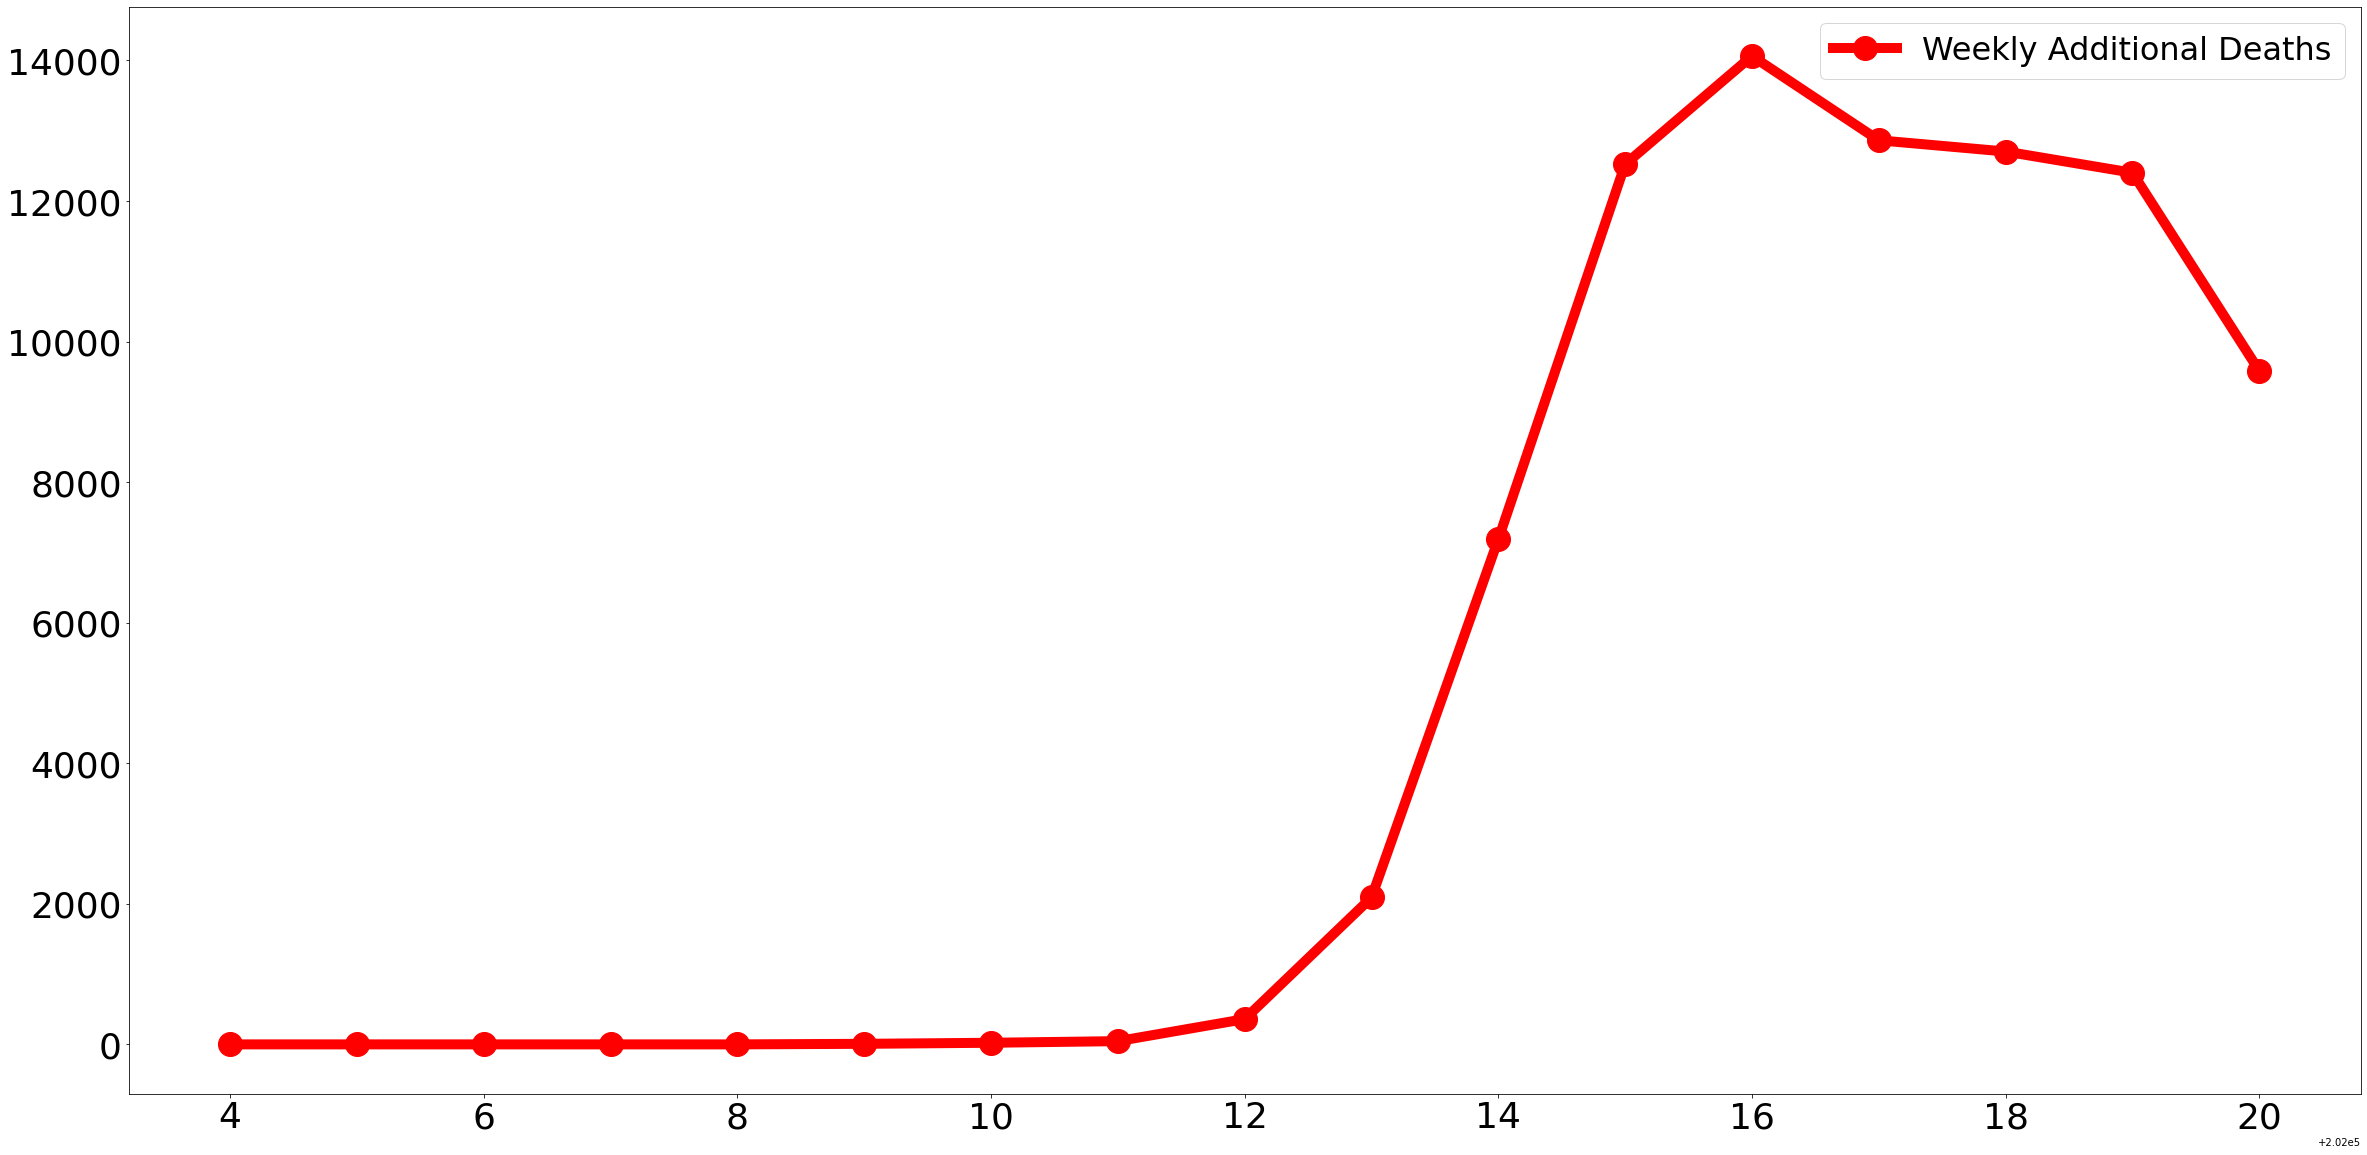

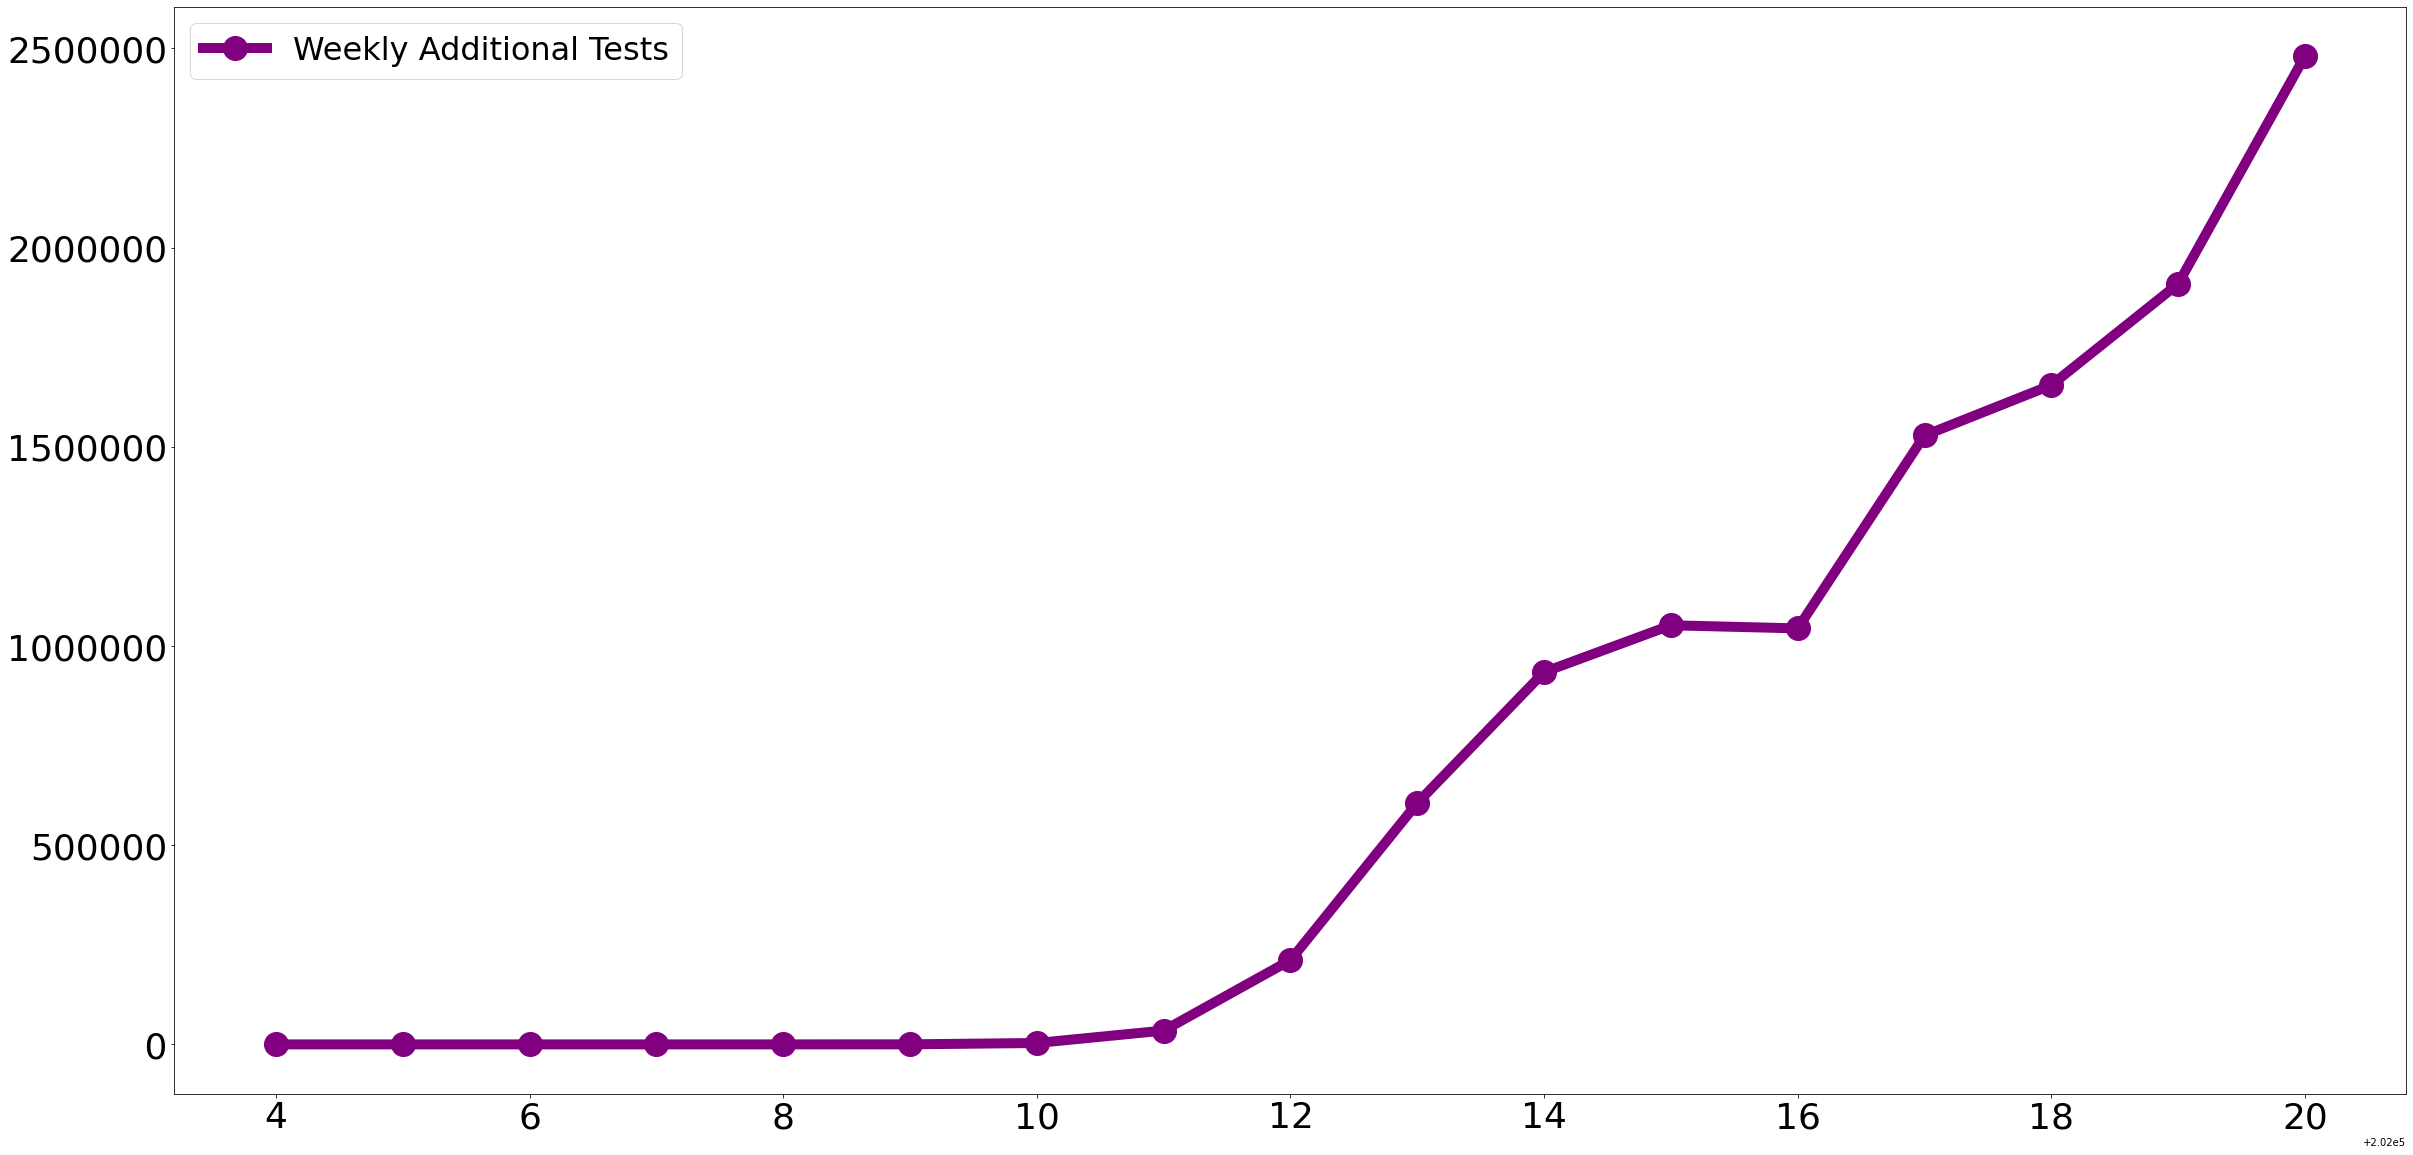

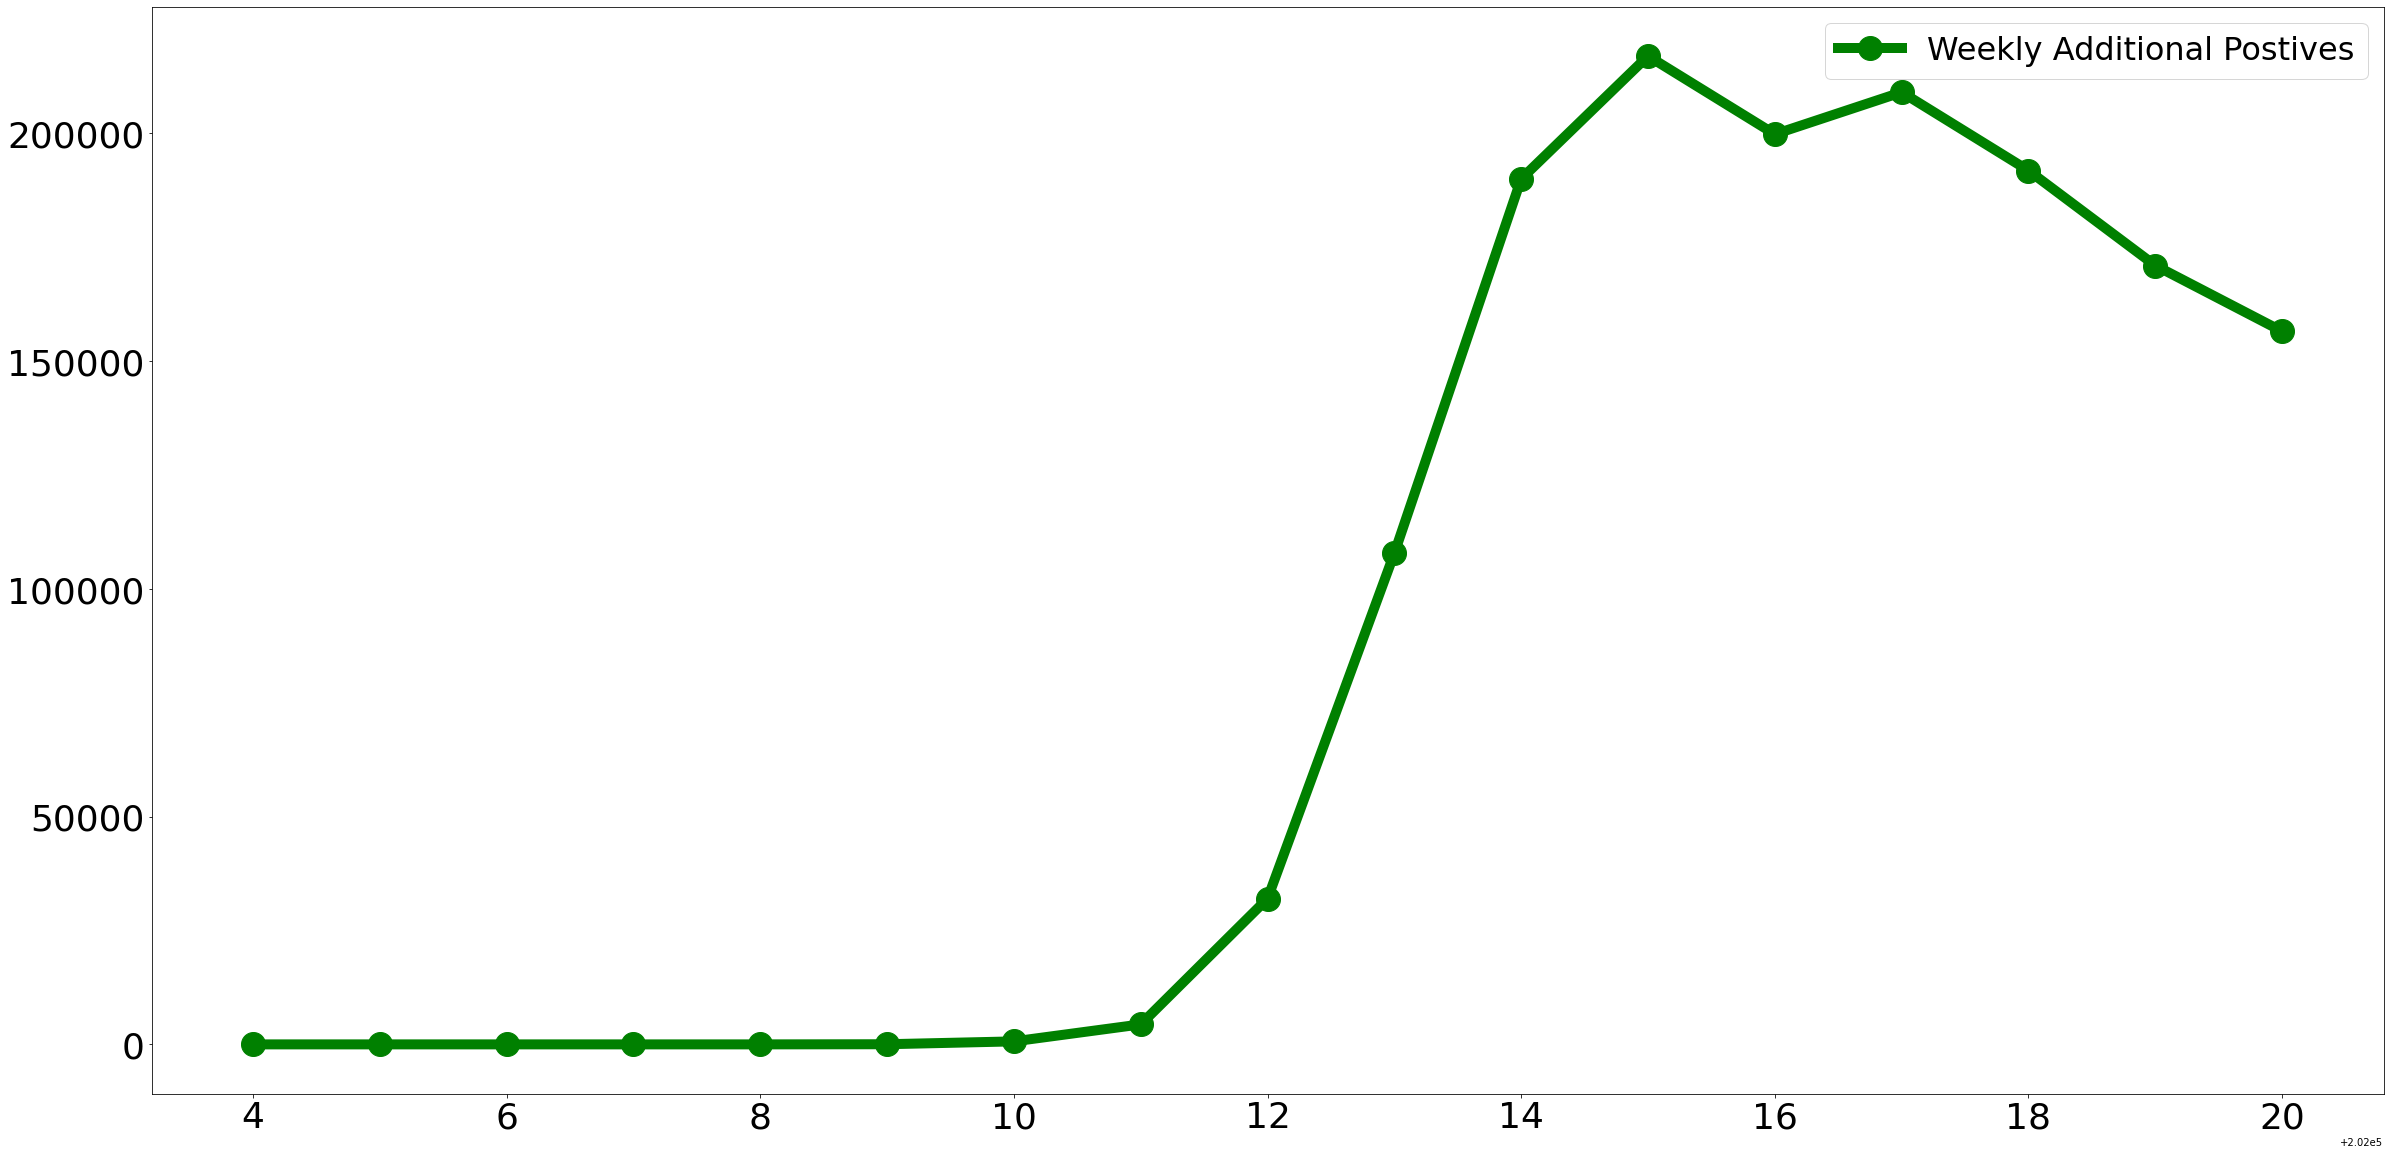

In [34]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

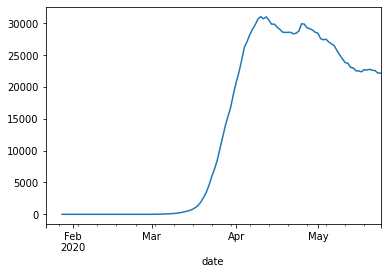

In [35]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

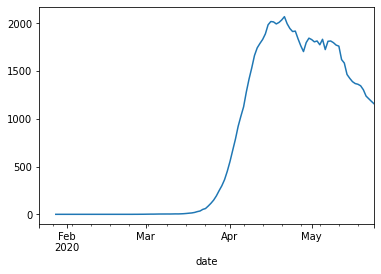

In [36]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

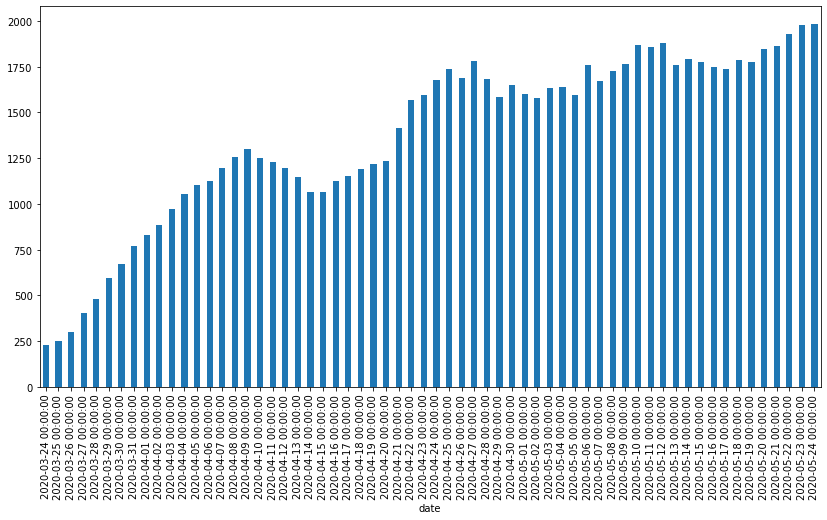

In [38]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


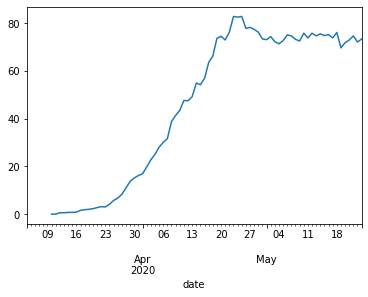

In [39]:
dfCAAvg.deathIncrease.plot.line()

In [40]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,death,total_positive,pct
794,FL,2020-05-24,50867,2316,50867,1.000000
795,FL,2020-05-23,50127,2312,50867,0.985452
796,FL,2020-05-22,49451,2268,50867,0.972163
797,FL,2020-05-21,48675,2222,50867,0.956907
798,FL,2020-05-20,47471,2173,50867,0.933238
799,FL,2020-05-19,46944,2129,50867,0.922877
800,FL,2020-05-18,46442,2073,50867,0.913008
801,FL,2020-05-17,45588,2049,50867,0.896220
802,FL,2020-05-16,44811,2040,50867,0.880944
803,FL,2020-05-15,43210,1991,50867,0.849470


In [41]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=7)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct


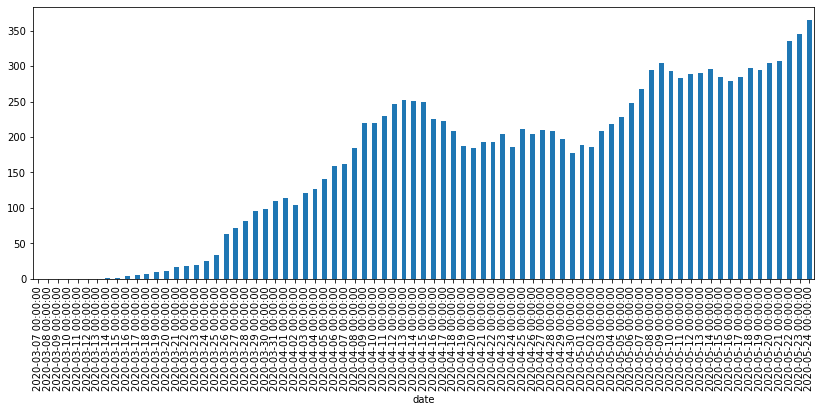

In [42]:

def showStateData(state):
  dfState = dfCovidtracking[dfCovidtracking.state==state].copy()
  dfState.date=pd.to_datetime(dfState.date)
  dfState.set_index('date', inplace=True)

  dfState[::-1].positiveIncrease.rolling(window=7).mean().plot.bar(figsize=(14,5))

showStateData('AL')


# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [45]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1635760
negative    12527934
pending         3860
death          91941
total       14167554
dtype: int64
Current Infection Rate 11.545818%
Percentage of US affected: 0.526354%
Observed CFR: 5.620690%
Percentage of US tested/affected: 4.343059%
Projected affected by cir = 37,897,938
Projected killed = 2,130,126


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [53]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.858349,8.737866
NJ,1.735540,6.797952
MA,1.344577,7.723943
RI,1.327687,12.526514
CT,1.135056,6.006136
DC,1.128730,7.366783
DE,0.904634,5.326753
IL,0.870467,5.902238
LA,0.799541,6.798236


In [54]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 4.315048%


In [55]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [57]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19496 entries, 0 to 19495
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         19432 non-null  object 
 1   location                         19496 non-null  object 
 2   date                             19496 non-null  object 
 3   total_cases                      19496 non-null  int64  
 4   new_cases                        19496 non-null  int64  
 5   total_deaths                     19496 non-null  int64  
 6   new_deaths                       19496 non-null  int64  
 7   total_cases_per_million          19119 non-null  float64
 8   new_cases_per_million            19119 non-null  float64
 9   total_deaths_per_million         19119 non-null  float64
 10  new_deaths_per_million           19119 non-null  float64
 11  total_tests                      5164 non-null   float64
 12  new_tests         

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [60]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    13784786.0
RUS     8685305.0
ITA     3391188.0
DEU     3147771.0
IND     2834798.0
          ...    
MDV       17174.0
MMR       17152.0
CRI       15704.0
ZWE       15084.0
BOL       12001.0
Name: total_tests, Length: 85, dtype: float64

In [61]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 44757166
Total tests done in USA : 13784786
How many more times has the world tested more than the US: 3.2


In [62]:
dfOwidLatest[isUSA].sum()

location                                                         United States
date                                                                2020-05-23
total_cases                                                            1601434
new_cases                                                                24147
total_deaths                                                             96007
new_deaths                                                                1305
total_cases_per_million                                                4838.13
new_cases_per_million                                                   72.951
total_deaths_per_million                                               290.049
new_deaths_per_million                                                   3.943
total_tests                                                        1.37848e+07
new_tests                                                               365728
total_tests_per_thousand                            

In [63]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-7:]

,new_cases,new_deaths
date,,
2020-05-18,18873,808
2020-05-19,21841,791
2020-05-20,19970,1568
2020-05-21,23285,1518
2020-05-22,25434,1263
2020-05-23,24147,1305
2020-05-24,21236,1080


In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state].set_index('date')\
.rolling(window=7).sum()


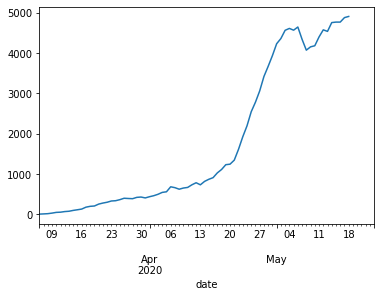

In [65]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [66]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

50127

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'].set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [68]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,280.0,859.0,39994.0,4677.0,44671.0
1,397.0,1444.0,62951.0,7143.0,70094.0
2,314.0,1647.0,55933.0,7257.0,63190.0
3,270.0,1029.0,48070.0,5816.0,53886.0
4,297.0,1139.0,76234.0,7598.0,83832.0
5,174.0,1026.0,77174.0,5350.0,82524.0
6,92.0,295.0,78760.0,4995.0,83755.0


# Socrata (San Francisco) Data

In [69]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [72]:
results_df.case_disposition.unique()

array(['Confirmed', 'Death'], dtype=object)

In [0]:
res = results_df.astype({'case_count':'int16'})

In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [75]:
dfresDead.groupby('date').sum()

,case_count
date,
2020-03-17T00:00:00.000,1
2020-03-24T00:00:00.000,1
2020-03-26T00:00:00.000,3
2020-03-27T00:00:00.000,2
2020-03-30T00:00:00.000,1
2020-03-31T00:00:00.000,1
2020-04-01T00:00:00.000,3
2020-04-05T00:00:00.000,1
2020-04-06T00:00:00.000,1


In [76]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail()

,new_cases
date,
2020-05-18T00:00:00.000,27
2020-05-19T00:00:00.000,48
2020-05-20T00:00:00.000,32
2020-05-21T00:00:00.000,44
2020-05-22T00:00:00.000,20


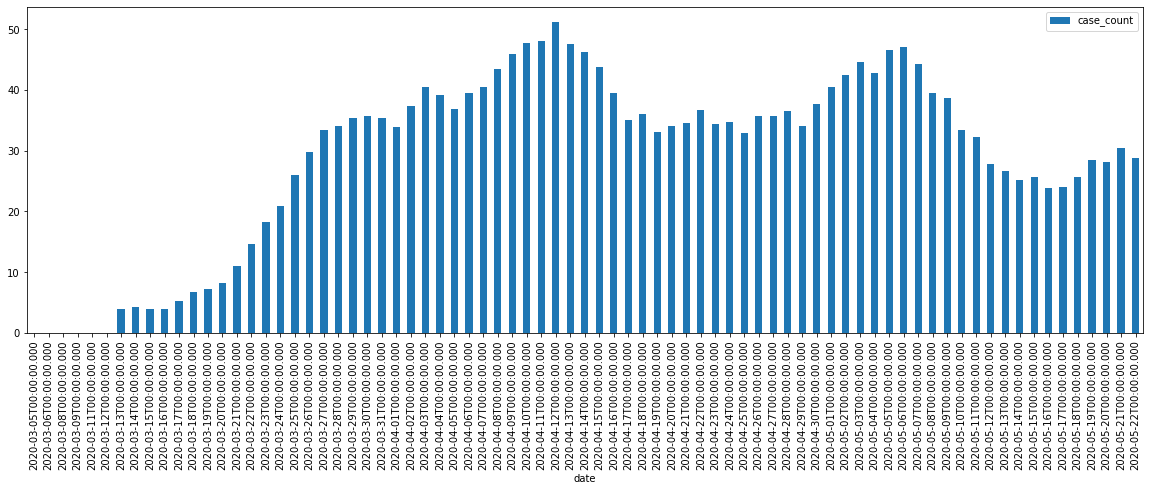

In [77]:
dfresConf.groupby('date').sum().rolling(window=7).mean().plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [79]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-05-19,336,14.0,9500.0,49.0,232.0
2020-05-20,343,14.0,9889.0,50.0,238.0
2020-05-21,352,14.0,10189.0,50.0,244.0
2020-05-22,369,14.0,10694.0,50.0,251.0
2020-05-23,388,14.0,11023.0,51.0,253.0


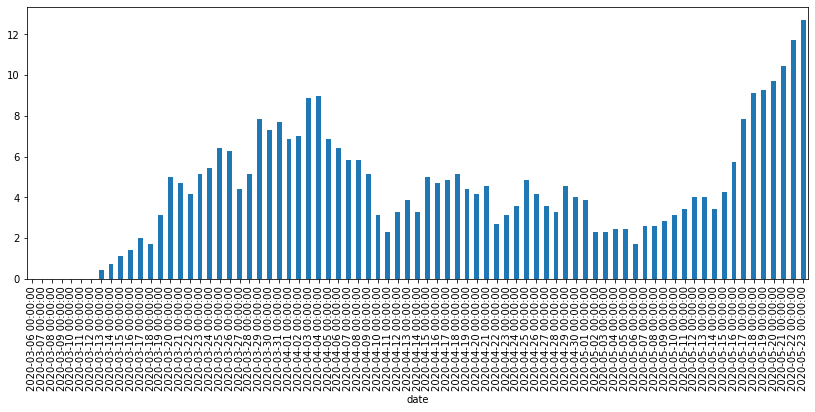

In [80]:
chart= df.positive.diff().rolling(window=7).mean().plot.bar(figsize=(14,5))

In [81]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.15%
Marin Population Tested: 4.24%


In [82]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-05-19     9.285714
2020-05-20     9.714286
2020-05-21    10.428571
2020-05-22    11.714286
2020-05-23    12.714286
Name: positive, dtype: float64